In [1]:
from labeyrieClasses import target #, fftw_psd
import numpy as np
import matplotlib.pyplot as plt
import ctypes
%matplotlib inline

In [2]:
binary = target()
binary.fits.fileName = "/home/niels/Documents/FITS/KP330.fits"
binary.fits.read(numDimensions = 3)

Filename: /home/niels/Documents/FITS/KP330.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      62   (512, 512, 1000)   float32   
None


In [3]:
# Testing PSD wrapper

# Use FFTW to calculate the PSD of a single image
# Input image = 512x512 ndarray of np.double32
# Output image = 

# Import shared C library
fftw_psd_dll = ctypes.CDLL('/home/niels/Dropbox/Thesis/Python/dev/fftw_psd.so')

# Image sizing parameters
imgsize = 512
psd_n = imgsize*(int(imgsize/2)+1)
img_n = imgsize**2

# Get input file
input_img = binary.fits.data[0]
#array = np.zeros((imgsize,imgsize))
#array[int(imgsize/2)+1,int(imgsize/2)] = 1
#array[int(imgsize/2)-1,int(imgsize/2)] = 1
#array[int(imgsize/2),int(imgsize/2)] = 1

In [14]:
# Reshape Square array to be flat
input_img_flat = np.reshape(input_img.astype(np.float32),(imgsize**2,1))

# Create pointers for in/out
img_ptr = (input_img_flat).ctypes.data_as(ctypes.POINTER(ctypes.c_float))
out_ptr = (np.zeros(img_n,np.float32)).ctypes.data_as(ctypes.POINTER(ctypes.c_float))
# Array type to be passed to wrapped C function
# Set input argument to be flat array of doubles (# of input img pixels)
fftw_psd_dll.psd.argtypes = [ctypes.POINTER(ctypes.c_float)]
fftw_psd_dll.psd.restype = ctypes.POINTER(ctypes.c_float)

# Calculate PSD, get a pointer returned
out_ptr = fftw_psd_dll.psd(img_ptr)

# Turn iterable pointer to array
psd_array = np.fromiter(out_ptr,np.float32,-1)
# Reshape array to image
psd_image = np.reshape(psd_array,(imgsize,int(imgsize/2+1)))

The slowest run took 4.72 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 4.38 µs per loop


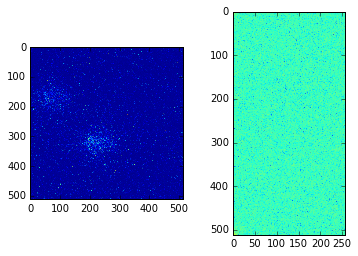

In [6]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.reshape(input_img_flat,(imgsize,imgsize)))
plt.subplot(1,2,2)
plt.imshow(np.log10(psd_image))
if (imgsize < 16):
    print(psd_image)
    print(psd_array)
    print(array)

In [ ]:
psd_image.max()